## Exercise 1

We have
$$\mathbb{P}(X_0=0, X_1=1, X_2=2)
= \mathbb{P}(X_0=0) \mathbb{P}(X_1=1|X_0=0) \mathbb{P}(X_2=2|X_1=1, X_0=0)
= \mathbb{P}(X_0=0) \mathbb{P}(X_1=1|X_0=0) \mathbb{P}(X_2=2|X_1=1)
= 0.3 \cdot 0.2 \cdot 0.0
= 0.0$$
and
$$\mathbb{P}(X_0=0, X_1=1, X_2=1)
= \mathbb{P}(X_0=0) \mathbb{P}(X_1=1|X_0=0) \mathbb{P}(X_2=1|X_1=1, X_0=0)
= \mathbb{P}(X_0=0) \mathbb{P}(X_1=1|X_0=0) \mathbb{P}(X_2=1|X_1=1)
= 0.3 \cdot 0.2 \cdot 0.1
= 0.006.$$

## Exercise 2

We have
$$\mathbb{P}(X_{n+1}=j|X_0=x_0, X_1=x_1, \dots, X_{n-1} = x_{n-1}, X_n=i) = \begin{cases}
0, &\text{if } j < i \\
\sum_{k \leq i} \mathbb{P}(Y_{n+1} = k), &\text{if } j = i \\
\mathbb{P}(Y_{n+1}=j), &\text{if } j > i \\
\end{cases}$$
The probability only dependends on the preceding value $X_n$, thus the chain is Markov. The transition matrix is
$$\begin{pmatrix}
0.1 & 0.3 & 0.2 & 0.4 \\
0 & 0.4 & 0.2 & 0.4 \\
0 & 0 & 0.6 & 0.4 \\
0 & 0 & 0 & 1 \\
\end{pmatrix}$$

## Exercise 3

Since $\mathcal{X}$ is finite, by Theorem 23.16(3), it has a recurrent state. Both states in $\mathcal{X}$ communicate with each other, so by Theorem 23.16(a), both states are recurrent. By Lemma 23.20, all both states are then also positive.

Since $p_{11}(1) = 1 - a > 0$ and $p_{22}(1) = 1-b > 0$, both states are aperiodic, and therefore, by Definition 23.22, both states are ergodic.

By Theorem 23.25, the chain has a unique stationary distribution that coincides with its limiting distribution, so we only need to check that 
$$\begin{pmatrix}
\frac{b}{a+b} & \frac{a}{a+b} \\
\frac{b}{a+b} & \frac{a}{a+b} \\
\end{pmatrix}$$
is the stationary distribution:
$$\begin{pmatrix}
\frac{b}{a+b} & \frac{a}{a+b} \\
\frac{b}{a+b} & \frac{a}{a+b} \\
\end{pmatrix}
\begin{pmatrix}
1 - a & a  \\
b & 1 - b \\
\end{pmatrix}
= \begin{pmatrix}
\frac{b(1-a) + ab}{a+b} & \frac{ba + a(1-b)}{a+b} \\
\frac{b(1-a) + ab}{a+b} & \frac{ba + a(1-b)}{a+b} \\
\end{pmatrix}
= \begin{pmatrix}
\frac{b}{a+b} & \frac{a}{a+b} \\
\frac{b}{a+b} & \frac{a}{a+b} \\
\end{pmatrix}.
$$

Alternatively, we can verify that $\pi$ satisfies the detailed balance
$$\pi_1 p_{12} = \frac{b}{a+b} a = b \frac{a}{a+b} = p_{21} \pi_2$$
and conclude by Theorem 23.26 that $\pi$ is stationary.

## Exercise 4

In [1]:
from itertools import islice

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
rng = np.random.default_rng(12345)

In [3]:
a = 0.1
b = 0.3

In [4]:
P = np.array([
    [1 - a, a],
    [b, 1 - b],
])

In [5]:
def generate(x):
    while True:
        yield x
        x = rng.choice(2, size=1, p=P[x - 1])[0] + 1

In [6]:
n_max = 10_000

In [7]:
x = np.fromiter(islice(generate(1), 0, n_max), int)

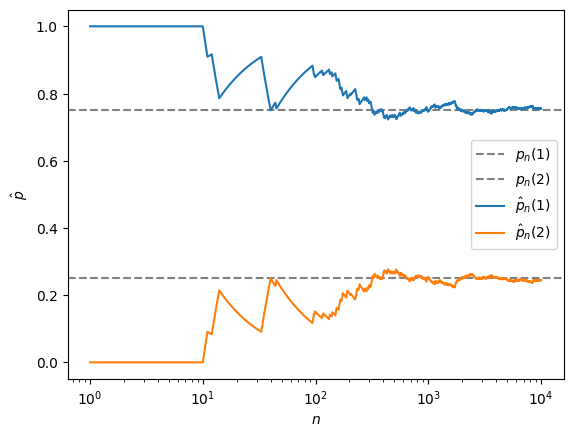

In [8]:
ns = np.arange(1, n_max + 1)

fig, ax = plt.subplots()
ax.axhline(b / (a + b), linestyle='--', color='grey', label='$p_n(1)$');
ax.axhline(a / (a + b), linestyle='--', color='grey', label='$p_n(2)$');
ax.plot(ns, np.cumsum(x == 1) / ns, label='$\\hat{p}_n(1)$');
ax.plot(ns, np.cumsum(x == 2) / ns, label='$\\hat{p}_n(2)$');
ax.set_xscale('log');
ax.set_xlabel('$n$');
ax.set_ylabel('$\\hat{p}$');
ax.legend();

## Exercise 5

(a) Using Theorem 3.24,
$$\begin{split}
M(n+1) 
&= \mathbb{E}[X_{n+1}] \\
&= \mathbb{E}[Y_1^{(n)} + \dots + Y_{X_n}^{(n)}] \\
&= \mathbb{E}[\mathbb{E}[Y_1^{(n)} + \dots + Y_{X_n}^{(n)}|X_n]] \\
&= \mathbb{E}[X_n \mathbb{E}[Y_1^{(n)}]] \\
&= \mathbb{E}[X_n \mu] \\
&= \mu \mathbb{E}[X_n] \\
&= \mu M(n). \\
\end{split}$$

Using Theorem 3.27,
$$\begin{split}
V(n+1) 
&= \mathbb{V}[X_{n+1}] \\
&= \mathbb{V}[Y_1^{(n)} + \dots + Y_{X_n}^{(n)}] \\
&= \mathbb{V}[\mathbb{E}[Y_1^{(n)} + \dots + Y_{X_n}^{(n)}|X_n]] + \mathbb{E}[\mathbb{V}[Y_1^{(n)} + \dots + Y_{X_n}^{(n)}|X_n]] \\
&= \mathbb{V}[\mu X_n] + \mathbb{E}[X_n \sigma^2] \\
&= \mu^2 V(n) + \sigma^2 M(n). \\
\end{split}$$

(b) We show by induction that $M(n) = \mu^n$. For the base case, we check that $M(1) = \mathbb{E}[X_1] = \mathbb{E}[Y_1^{(1)}] = \mathbb{E}[Y] = \mu = \mu^1$. For the inductive step, assume $M(n) = \mu^n$, then from (a), $M(n+1) = \mu M(n) = \mu^{n+1}$ as required.

Then for $V(n)$, we have the recurrence relation
$$V(n+1) = \sigma^2 \mu^n + \mu^2 V(n).$$
Rearranging the terms, we obtain
$$V(n+1) - \mu^2 V(n) = \sigma^2 \mu^n.$$
For the homogenous equation $V(n+1) - \mu^2 V(n) = 0$, the characteristic equation is
$$r^{n+1} - \mu^2 r^n = 0,$$
which has the solution $r = \mu^2$, thus 
$$V(n) = \mu^{2n}$$
is a solution of the homogenous equation.

For the inhomogenous equation, we guess the solution
$$V(n) = A \mu^n + B.$$
Substituting the guess into the original equation, we obtain
$$A \mu^{n+1} + B - \mu^2 (A \mu^{n} + B) = \sigma^2 \mu^n$$
or
$$(A \mu - A \mu^2 - \sigma^2) \mu^n + (B - \mu^2 B) = 0.$$
Setting the coefficients in front of powers of $\mu$ to 0, we obtain
$$\begin{split}
A &= \frac{\sigma^2}{\mu(1-\mu)} \\
B &= 0,
\end{split}$$
provided $\mu \neq 1$.
Thus,
$$V(n) = \frac{\sigma^2}{\mu(1-\mu)} \mu^n$$
is a solution to the inhomogenous equation, and the general solution to the inhomogenous equation is given by
$$V(n) = C \mu^{2n} + \frac{\sigma^2}{\mu(1-\mu)} \mu^n.$$
The boundary condition $V(1) = \sigma^2$ yields
$$\sigma^2 = C \mu^2 + \frac{\sigma^2}{\mu(1-\mu)} \mu,$$
from which
$$C = -\frac{\sigma^2}{\mu(1-\mu)},$$
so finally
$$V(n) 
= -\frac{\sigma^2}{\mu(1-\mu)} \mu^{2n} + \frac{\sigma^2}{\mu(1-\mu)} \mu^n 
= \frac{\sigma^2 \mu^n}{\mu (1-\mu)}(1 - \mu^n)
= \sigma^2 \mu^{n-1} \frac{1 - \mu^n}{1-\mu}
= \sigma^2 \mu^{n-1}(1 + \mu + \dots + \mu^{n-1}).$$

If $\mu = 1$, we have
$$M(n+1) = \mu M(n) = M(n) = M(1) = 1$$
and
$$V(n+1) = \sigma^2 M(n) + \mu^2 V(n) = \sigma^2 + V(n),$$
so
$$V(n) = n \sigma^2.$$

(c) If $\mu > 1$, then $V(n) \approx \sigma^2 \mu^{2(n-1)}$, i.e. it grows exponentially in $n$.

If $\mu = 1$, $V(n) = n \sigma^2$, so it grows linearly in $n$.

If $\mu < 1$, $V(n) \to 0$ as $n \to \infty$.

(d) The probability of going extinct after no more than $n$ generation can be decomposed into the probability of having $k$ children, such that their descendants all go extinct after no more than $n-1$ generations, thus
$$\begin{split}
F(n) = \mathbb{P}(\min\{n: X_n = 0\}) 
&= \sum_{k=0}^\infty \mathbb{P}(X_0 \text{ has } k \text{ children}) \mathbb{P}(\text{the descendants of each of the } k \text{ children go extinct after at most } n-1 \text{ generations}) \\
&= \sum_{k=0}^\infty p_k (\mathbb{P}(\text{the descendants of one individual go extinct after at most } n-1 \text{ generations}))^k \\
&= \sum_{k=0}^\infty p_k F(n-1)^k. \\
\end{split}$$

(e)

In [9]:
def F(p, n):
    if n == 0:
        return 0.
    k = len(p)
    return np.sum(p * F(p, n - 1) ** np.arange(k))

In [10]:
p = np.array([0.25, 0.5, 0.25])

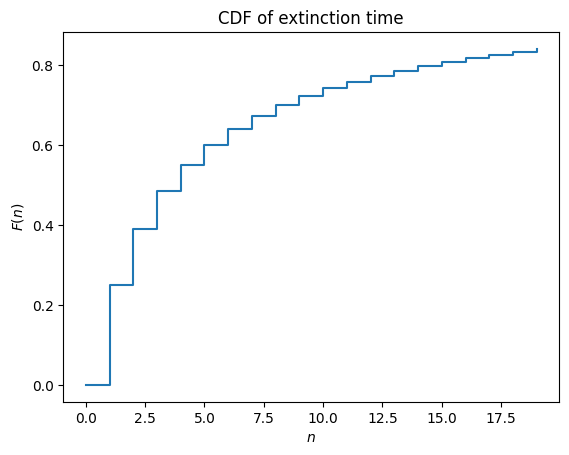

In [11]:
n_max = 20
fig, ax = plt.subplots()
ax.step(np.arange(n_max), [F(p, n) for n in range(n_max)], where='post');
ax.set_xlabel('$n$');
ax.set_ylabel('$F(n)$');
ax.set_title('CDF of extinction time');

## Exercise 6

We try to find the probabilities $\pi$ that satisfy the detailed balance (23.15) and $\sum_i \pi_i = 1$:
$$\begin{split}
\pi_1 0.5 &= \pi_2 0.05 \\
\pi_1 0.1 &= \pi_3 0.05 \\
\pi_2 0.25 &= \pi_3 0.5 \\
\pi_1 + \pi_2 + \pi_3 &= 1 \\
\end{split}$$
however the system is inconsistent. Therefore, we find the stationary distribution numerically:

In [12]:
P = np.array([
    [0.4, 0.5, 0.1],
    [0.05, 0.7, 0.25],
    [0.05, 0.5, 0.45],
])

In [13]:
np.linalg.matrix_power(P, 30)

array([[0.07692308, 0.625     , 0.29807692],
       [0.07692308, 0.625     , 0.29807692],
       [0.07692308, 0.625     , 0.29807692]])

## Exercise 7

See a separate notebook for the proof of Theorem 23.16.

## Exercise 8

We have $p_{66}(n) = 1$ for all $n$, thus $\sum_n p_{66}(n) = \infty$ and state 6 is recurrent by Theorem 23.15.

We have $p_{35}(n) = 1$ and $p_{53}(n) = 1$, thus $p_{33}(2n) = 1$ and $p_{55}(2n) = 1$ for all $n$. Therefore, $\sum_n p_{33}(n) = \infty$ and $\sum_n p_{55}(n) = \infty$, so both states 3 and 5 are recurrent.

The probabilities of returning to state 4 are all zero: $p_{i4}(n) = 0$ for all $i$ and $n > 0$, thus $p_{44}(n) = 0$ for $n > 0$ and $\sum_n p_{44}(n) < \infty$ and state 4 is transient by Theorem 23.15.

Note that $\{3,5\}$ and $\{6\}$ are closed sets, and that starting from state 1, the chain can remain in state 1 or move to one of $\{3,5\}$ or $\{6\}$, thus the probability of remaining in state 1 after $n$ steps is $p_{11}(n) = 1/3^n$ and $\sum_n p_{11}(n) = 3/2 < \infty$, therefore by Theorem 23.15, state 1 is transient.

From state 2, the chain can go to states 1 and 3, from which it cannot return to 2, or remain in state 2 with probability $1/4$, therefore $p_{22}(n) = 1/4^n$ and $\sum_n p_{22}(n) = 4/3 < \infty$, therefore by Theorem 23.15, state 2 is transient.

In [14]:
import graphviz

In [15]:
def plot(dot, P):
    for i in range(P.shape[0]):
        label = f'X{i + 1}'
        dot.node(label, label)
    for i in range(P.shape[0]):
        for j in range(P.shape[1]):
            if P[i, j] > 0:
                dot.edge(f'X{i + 1}', f'X{j + 1}', label=f'{P[i, j]:0.2f}')
    return dot

In [16]:
dot = graphviz.Digraph()

In [17]:
P = np.array([
    [1/3, 0, 1/3, 0, 0, 1/3],
    [1/2, 1/4, 1/4, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [1/4, 1/4, 1/4, 0, 0, 1/4],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
])

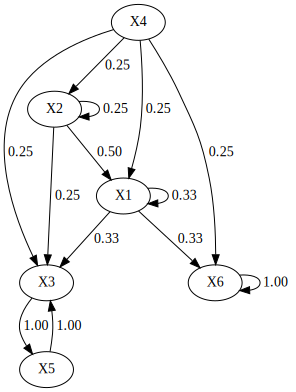

In [18]:
plot(dot, P)

## Exercise 9

We have
$$\pi P 
= \begin{pmatrix} \frac12 & \frac12 \end{pmatrix} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
= \begin{pmatrix} \frac12 & \frac12 \end{pmatrix},$$
so by Definition 23.23, $\pi$ is stationary. The chain does not converge, however, since
$$P^2 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$
and
$$P^3 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix},$$
so the chain alternates between the two transition matrices.

## Exercise 10

Since the state space is finite, by Theorem 23.16(c), the chain has a recurrent state. Because all states communicate, all of the states are recurrent. By Theorem 23.20, all states are therefore positive.

Since $p_{11}(1) > 0$, state 1 is aperiodic. By Lemmma 23.21, all states are thus aperiodic. Therefore, all states are ergodic.

By Theorem 23.25, the chain has a unique stationary distribution which coincides with the limiting distribution.

Therefore, we only need to identify a stationary distribution. Suppose this distribution is $\pi=(\pi_1, \pi_2, \pi_3, \pi_4, \pi_5)$. By Definition 23.23, we have
$$\pi P = \begin{pmatrix}\pi_1 & \pi_2 & \pi_3 & \pi_4 & \pi_5\end{pmatrix}
\begin{pmatrix}
q & p & 0 & 0 & 0 \\
q & 0 & p & 0 & 0 \\
q & 0 & 0 & p & 0 \\
q & 0 & 0 & 0 & p \\
1 & 0 & 0 & 0 & 0 \\
\end{pmatrix}
=\begin{pmatrix}
q(\pi_1 + \pi_2 + \pi_2 + \pi_3) + \pi_4 & p \pi_1 & p \pi_2 & p \pi_3 & p \pi_4
\end{pmatrix} = \pi,$$
thus
$$\begin{split}
\pi_1 &= q(\pi_1 + \pi_2 + \pi_2 + \pi_3) + \pi_4 \\
\pi_2 &= p \pi_1 \\
\pi_3 &= p \pi_2 = p^2 \pi_1 \\
\pi_4 &= p \pi_3 = p^3 \pi_1 \\
\pi_5 &= p \pi_4 = p^4 \pi_1 \\
\end{split}$$
Since $\pi_1 + \pi_2 + \pi_3 + \pi_4 + \pi_5 = 1$, we obtain
$$\begin{split}
\pi_1 &= \frac{1}{1 + p + p^2 + p^3 + p^4} = \frac{1 - p}{1 - p^5} \\
\pi_2 &= \frac{p}{1 + p + p^2 + p^3 + p^4} = p \frac{(1 - p)}{1 - p^5} \\
\pi_3 &= \frac{p^2}{1 + p + p^2 + p^3 + p^4} = p^2 \frac{(1 - p)}{1 - p^5} \\
\pi_4 &= \frac{p^3}{1 + p + p^2 + p^3 + p^4} = p^3 \frac{(1 - p)}{1 - p^5} \\
\pi_5 &= \frac{p^4}{1 + p + p^2 + p^3 + p^4} = p^4 \frac{(1 - p)}{1 - p^5} \\
\end{split}$$

We can verify the limiting distribution numerically:

In [19]:
p = 0.3

In [20]:
P = np.array([
    [1 - p, p, 0, 0, 0],
    [1 - p, 0, p, 0, 0],
    [1 - p, 0, 0, p, 0],
    [1 - p, 0, 0, 0, p],
    [1, 0, 0, 0, 0],
])

In [21]:
np.linalg.matrix_power(P, 15)

array([[0.70170515, 0.21051154, 0.06315346, 0.01894604, 0.00568381],
       [0.70170513, 0.21051155, 0.06315346, 0.01894604, 0.00568381],
       [0.70170513, 0.21051154, 0.06315348, 0.01894604, 0.00568381],
       [0.70170513, 0.21051154, 0.06315346, 0.01894605, 0.00568381],
       [0.70170513, 0.21051154, 0.06315346, 0.01894604, 0.00568383]])

In [22]:
p1 = (1 - p) / (1 - p ** 5)
p1 * p ** np.arange(5)

array([0.70170514, 0.21051154, 0.06315346, 0.01894604, 0.00568381])

## Exercise 11

We verify the conditions in Definition 23.32:

1. Since $\lambda(t) > 0$, $s=\int_0^t \lambda(u) du = 0$ implies $t = 0$. Therefore, $Y(0) = X(0) = 0$.

2. Since $\lambda(t) > 0$, $s=\int_0^t \lambda(u) du$ is a monotonically increasing function of $t$, so it has an inverse, which is also a monotonically increasing function $t(s)$. For any $0 = s_0 < s_1 < s_2 < dots < s_n$, and the corresponding $0 = t(s_0) < t(s_1) < t(s_2) < \dots < t(s_n)$, the increments
$$Y(s_1) - Y(s_0) = X(t(s_1)) - X(t(s_0), Y(s_2) - Y(s_1) = X(t(s_2)) - X(t(s_1), \dots, Y(s_n) - Y(s_{n-1}) = X(t(s_n)) - X(t(s_{n-1})$$
are independent.

3. By the Fundamental Theorem of Calculus, $s$ is a continuous function of $t$. Then also $t$ is a continuous monotonically increasing function of $s$. The function $s(t)$ is differentiable for all $s > 0$ with $s'(t) = \lambda(t)$, so $t'(s) = \frac{1}{\lambda(t(s))}$.

Now, we have
$$Y(s + ds) - Y(s) = X(t(s+ds)) - X(t(s)) = X(t(s) + t'(s) ds + o(ds)) - X(t(s))$$
and since $X$ is a Poisson process
$$\begin{split}
\mathbb{P}(Y(s + ds) - Y(s) = 1)
&= \mathbb{P}(X(t(s) + t'(s) ds + o(ds)) - X(t(s)) = 1) \\
&= \lambda(t(s)) (t's(s) ds + o(ds)) + o(t's(s) ds + o(ds)) \\
&= \lambda(t(s)) t's(s) ds + o(ds) \\
&= \lambda(t(s)) \frac{1}{\lambda(t(s))} ds + o(ds) \\
&= ds + o(ds)
\end{split}$$
and
$$\begin{split}
\mathbb{P}(Y(s + ds) - Y(s) \geq 2)
&= \mathbb{P}(X(t(s) + t'(s) ds + o(ds)) - X(t(s)) \geq 2) \\
&= o(t's(s) ds + o(ds)) \\
&= o(ds).
\end{split}$$
By Definition 23.32, $Y$ is then a Poisson process with constant intensity $\lambda(t(s)) = 1$.

## Exercise 12

By Theorem 23.33,
$X(t+s) - X(t) \sim \text{Poisson}(\lambda s)$, so
$$\begin{split}\mathbb{P}(X(t) = x | X(t+s) = n) 
&= \frac{\mathbb{P}(X(t) = x, X(t+s) = n)}{\mathbb{P}(X(t+s) = n)} \\
&= \frac{\mathbb{P}(X(t) = x) \mathbb{P}(X(t+s) = n | X(t) = x}{\mathbb{P}(X(t+s) = n)} \\
&= \frac{\mathbb{P}(X(t) = x) \mathbb{P}(X(t+s) - X(t) = n - x | X(t) = x)}{\mathbb{P}(X(t+s) = n)} \\
&= \frac{e^{-\lambda t} \frac{(\lambda t)^x}{x!} e^{-\lambda s} \frac{(\lambda s)^{n-x}}{(n-x)!}}{e^{-\lambda(t+s)}\frac{(\lambda(t+s))^n}{n!}} \\
&= \frac{(\lambda t)^x (\lambda s)^{n-x}}{(\lambda(t+s))^n} \frac{n!}{x! (n-x)!} \\
&= \frac{t^x s^{n-x}}{(t+s)^n} \frac{n!}{x! (n-x)!} \\
&= {n \choose x} \left(\frac{t}{t+s}\right)^x \left(\frac{s}{t+s}\right)^{n-x}, \\
\end{split}$$
thus
$$X(t) = x | X(t+s) = n \sim \text{Binomial}\left(n, \frac{t}{t+s}\right).$$

## Exercise 13

Suppose $X \sim \text{Poisson}(\mu)$, let
$$f(\mu) = \mathbb{P}(X=1,3,5,\dots) = \sum_{i=0}^\infty e^{-\mu} \frac{\mu^{2i+1}}{(2i+1)!},$$
then
$$\begin{split}
f'(\mu) 
&= \sum_{i=0}^\infty -e^{-\mu} \frac{\mu^{2i+1}}{(2i+1)!} + \sum_{i=0}^\infty e^{-\mu} \frac{(2i+1)\mu^{2i}}{(2i+1)!} \\
&= \sum_{i=0}^\infty -e^{-\mu} \frac{\mu^{2i+1}}{(2i+1)!} + \sum_{i=0}^\infty e^{-\mu} \frac{\mu^{2i}}{(2i)!} \\
&= -\mathbb{P}(X=1,3,5,\dots) + \mathbb{P}(X=0,2,4,\dots) \\
&= 1 - 2\mathbb{P}(X=1,3,5,\dots) \\
&= 1 - 2f(\mu). \\
\end{split}$$
Denote $g(\mu) = 1 - 2f(\mu)$, so $g'(\mu) = -2f'(\mu)$ and
$$-\frac{1}{2} g'(\mu) = g(\mu),$$
which we solve to obtain
$$g(\mu) = C e^{-2\mu}$$
and correspondingly
$$f(\mu) = \frac{1 - C e^{-2\mu}}{2}$$
When $\mu = 0$, $\mathbb{P}(X = 0) = 1$ and $\mathbb{P}(X > 0) = 0$, so $f(0) = 0$, which yields $C = 1$, and finally
$$f(\mu) = \frac{1 - e^{-2\mu}}{2}.$$
For a Poisson process with intensity $\lambda$, we have $X(t) \sim \text{Poisson}(\lambda t)$, thus
$$\mathbb{P}(X(t)=1,3,5,\dots) = \frac{1 - e^{-2\lambda t}}{2}.$$

We can verify the result numerically:

In [23]:
lam = 0.3
n = 10
np.sum(stats.poisson.pmf(np.arange(n) * 2 + 1, lam))

np.float64(0.22559418195298672)

In [24]:
(1 - np.exp(-2 * lam)) / 2

np.float64(0.22559418195298675)

## Exercise 14

Consider a counting process $Y(t)$ that only counts the users still logged in at a given time $s$.

Then $Y(0) = 0$. For any $0 = t_0 < t_1 < t_2 < \dots < t_n$, the increments $Y(t_1) - Y(t_0), Y(t_2) - Y(t_1), \dots, Y(t_n) - Y(t_{n-1})$ are independent. Finally,
$$\begin{split}
\mathbb{P}(Y(t+h) - Y(t) = 1)
&= \mathbb{P}(\text{a user logs in at time } t) \mathbb{P}(\text{the user is still logged in at time } s | \text{the user logs in at } t) \\
&= \mathbb{P}(X(t+h) - X(t) = 1) \mathbb{P}(\text{the user stays logged in for at least } s - t | \text{the user logs in at } t) \\
&= (\lambda h + o(h)) (1 - G(s - t)) \\
&= \lambda h (1 - G(s - t)) + o(h) \\
\end{split}$$
and
$$\begin{split}
\mathbb{P}(Y(t+h) - Y(t) = k)
&= \mathbb{P}(k \text{ users log in at time } t) \mathbb{P}(k \text{users are still logged in at time } s | k \text{ users log in at } t) \\
&= \mathbb{P}(X(t+h) - X(t) = k) \mathbb{P}(k \text{users stay logged in for at least } s - t | k \text{users log in at } t) \\
&= o(h) (1 - G(s - t))^k \\
&= o(h). \\
\end{split}$$

By Definition 23.32, this is an inhomogeneous Poisson process with intensity function $\lambda(t) = \lambda (1 - G(s - t))$.

## Exercise 15

In [25]:
import scipy.integrate as integrate

In [26]:
lam = 5
n = 10
m = 100_000

In [27]:
def f(x):
    return (x - 0.5) ** 3 + (x - 0.5) ** 2 - 0.2

We integrate the function numerically:

In [28]:
integrate.quad(f, 0, 1)

(-0.11666666666666668, 1.5126911851710474e-15)

and check that the integral matches the value from the Poisson integration:

In [29]:
w = np.cumsum(stats.expon.rvs(scale=1 / lam, size=(m, n), random_state=rng), axis=1)
np.mean(np.sum(f(w) * (w <= 1.0), axis=1)) / lam

np.float64(-0.11639538078525713)

Conditional on having 5 events in $[0, 1]$, ordered waiting times have beta distributions. However, unordered they have a uniform distribution.

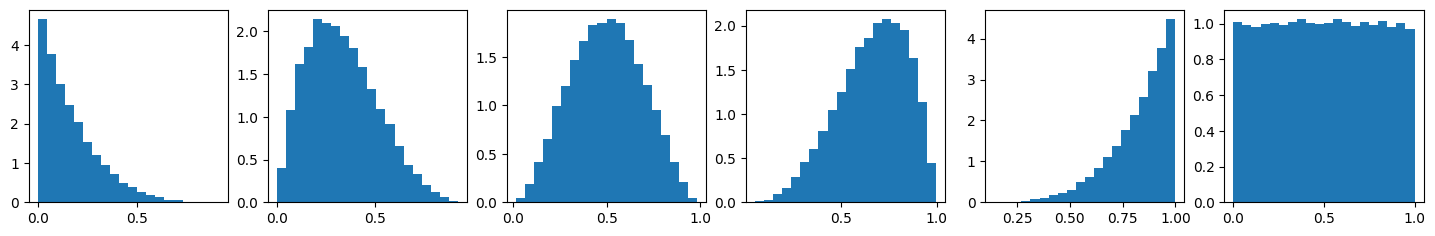

In [30]:
mask = (w[:, 4] <= 1) & (w[:, 5] > 1)

fig, axs = plt.subplots(1, 6, figsize=(18, 2.5))
for i in range(5):
    axs[i].hist(w[mask, i], bins=20, density=True);
axs[5].hist(w[mask, :5].flatten(), bins=20, density=True);

In [31]:
np.mean(f(w[mask, 0]))

np.float64(-0.12257130659913781)

In [36]:
np.mean(f(w[mask, 0])) + np.mean(f(w[mask, 1])) + np.mean(f(w[mask, 2])) + np.mean(f(w[mask, 3])) + np.mean(f(w[mask, 4]))

np.float64(-0.5864232632647116)

In [33]:
np.mean(f(w[mask, 2]))

np.float64(-0.16474153913233408)

In [34]:
np.mean(f(w[mask, 3]))

np.float64(-0.12288413166376211)

In [35]:
np.mean(f(w[mask, 4]))

np.float64(-0.017448182024180615)

## Exercise 16

Let $Y \sim \text{Poisson}(\lambda \pi t^2)$ be the number of points lying in the circle of radius $t$ around $x_0$. Then $\mathbb{P}(X > t)$ equals the probability that there are no points within the circle, i.e. 
$$\mathbb{P}(X > t) = \mathbb{P}(Y = 0) = e^{-\lambda \pi t^2}.$$
Then
$$F_X(x) = \mathbb{P}(X \leq x) = 1 - \mathbb{P}(X > x) = 1 - e^{-\lambda \pi x^2}$$
and
$$f_X(x) = 2\lambda \pi x e^{-\lambda \pi x^2},$$
so
$$\begin{split}
\mathbb{E}[X]
&= \int_0^\infty x f(x) dx
= \int_0^\infty 2 \lambda \pi x^2 e^{-\lambda \pi x^2} dx
= \int_0^\infty x e^{-\lambda \pi x^2} d(\lambda \pi x^2)
= -\int_0^\infty x d\left(e^{-\lambda \pi x^2}\right) \\
&= - \left. x e^{-\lambda \pi x^2} \right|_0^\infty + \int_0^\infty e^{-\lambda \pi x^2} dx
= \frac{1}{2} \int_{-\infty}^{+\infty} e^{-\lambda \pi x^2} dx
= \frac{1}{2} \sqrt{\frac{\pi}{\lambda \pi}}
= \frac{1}{2\sqrt{\lambda}}.
\end{split}
$$